# Notebook #3: Gestión de Outliers

In [87]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gestionar warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Librería para el acceso a variables y funciones
# -----------------------------------------------------------------------
import sys
sys.path.append("../../")
from src import soporte_nulos as sn
from src import soporte_preprocesamiento as sp

- Importamos el dataframe generado en el notebook anterior y lo comprobamos.

In [88]:
df = pd.read_csv("../../datos/modelo2/csv_encoded.csv", index_col=0)
df.sample(2)

,price,size,distance,exterior,rooms,bathrooms,floor,hasLift,propertyType_chalet,propertyType_countryHouse,propertyType_duplex,propertyType_flat,propertyType_penthouse,propertyType_studio,municipality
202,720.0,36.0,5975,1,0,1,2.0,1,0.0,0.0,0.0,0.0,0.0,1.0,705.633136
190,740.0,65.0,8443,1,3,1,1.0,1,0.0,0.0,0.0,1.0,0.0,0.0,705.633136


## Outliers multivariados

- Los outliers multivariados se identifican considerando las relaciones y dependencias entre dos o más variables, en este caso, tenemos size y distance, con lo cual, tendremos que usar Isolation Forest o Local Outlier Factor.

- Sabemos que el formato CSV no guarda tipos de datos, con lo cual, debemos transformar las columnas con encoding a string, debido a que la gestión de outliers es, naturalmente, sobre numéricas.

In [89]:
df.columns

Index(['price', 'size', 'distance', 'exterior', 'rooms', 'bathrooms', 'floor',
       'hasLift', 'propertyType_chalet', 'propertyType_countryHouse',
       'propertyType_duplex', 'propertyType_flat', 'propertyType_penthouse',
       'propertyType_studio', 'municipality'],
      dtype='object')

In [90]:
df[['exterior', 'rooms', 'bathrooms', 'floor',
       'hasLift', 'propertyType_chalet', 'propertyType_countryHouse',
       'propertyType_duplex', 'propertyType_flat', 'propertyType_penthouse',
       'propertyType_studio', 'municipality']] = df[['exterior', 'rooms', 'bathrooms', 'floor',
       'hasLift', 'propertyType_chalet', 'propertyType_countryHouse',
       'propertyType_duplex', 'propertyType_flat', 'propertyType_penthouse',
       'propertyType_studio', 'municipality']].astype(str)

- Recordemos nuestros outliers con la ayuda del boxplot:

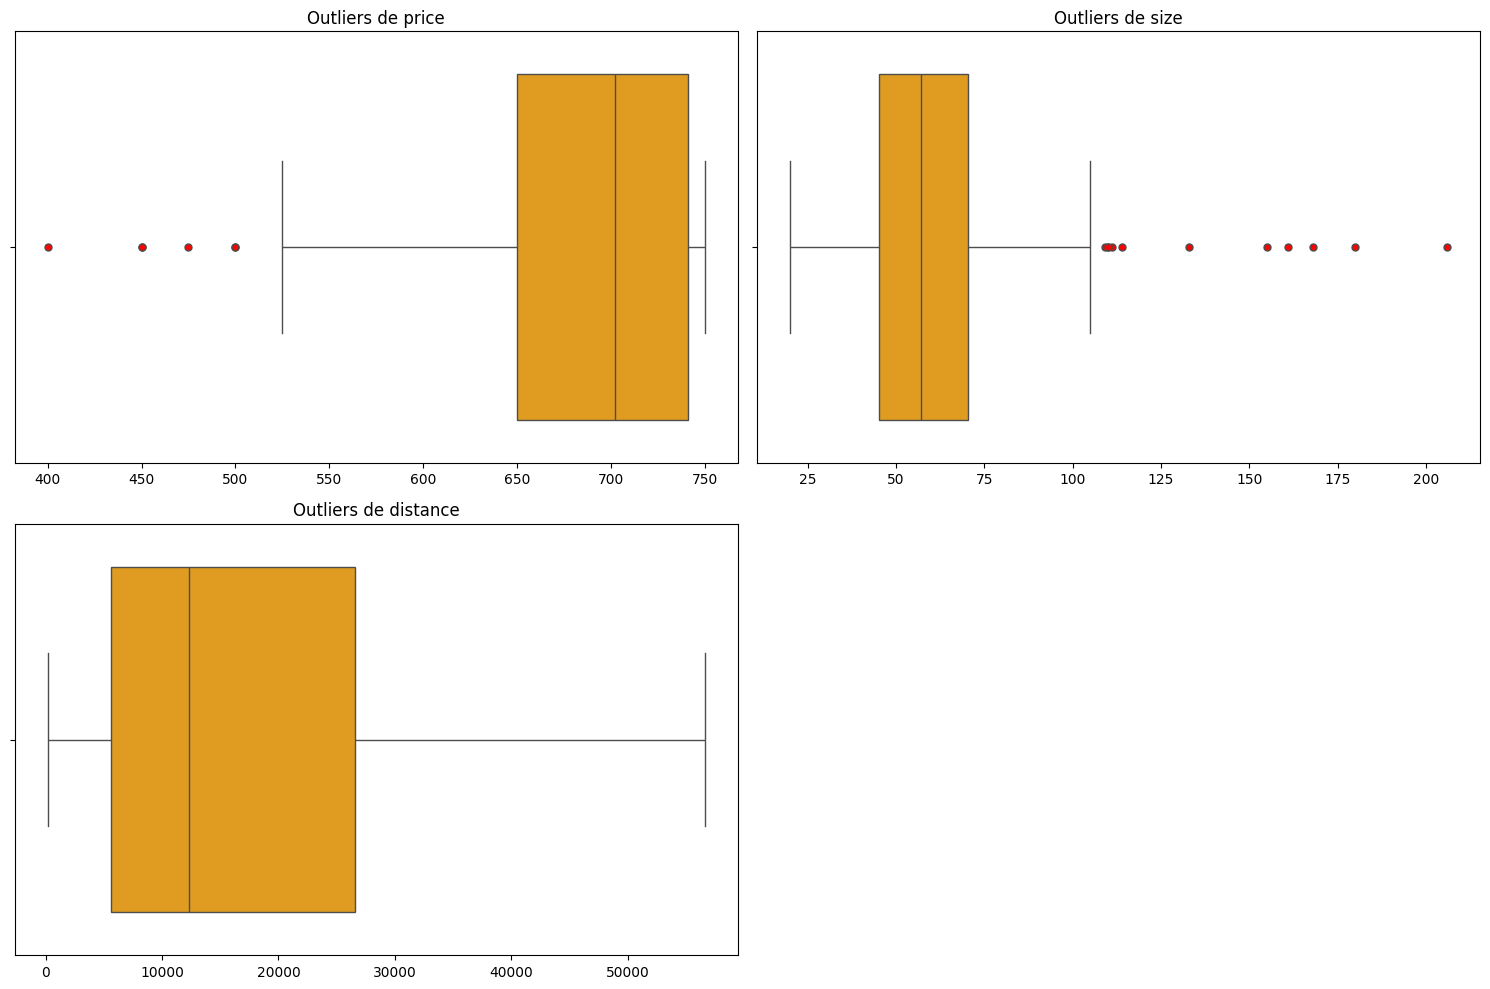

In [91]:
sp.detectar_outliers(df)

- Tras el filtro aplicado en el EDA (Notebook #1), podemos ver que son escasos y claramente diferentes. La elección entre Local Outlier Factor (LOF) y Isolation Forest (IF) depende del contexto de los datos y el problema que deseamos resolver.

- En este caso, para gestionar los nulos, usaremos el Isolation Forest, debido a que tenemos datos atípicos raros y claramente diferentes al resto de los datos.

In [92]:
col_numericas = df.select_dtypes(include=np.number).columns
col_numericas

contaminacion = [0.01, 0.05]
estimadores = [25, 50, 75]

sn.outliers_isolation_forest(df, contaminacion, estimadores)

,price,size,distance,exterior,rooms,bathrooms,floor,hasLift,propertyType_chalet,propertyType_countryHouse,...,propertyType_flat,propertyType_penthouse,propertyType_studio,municipality,outliers_ifo_0.01_25,outliers_ifo_0.01_50,outliers_ifo_0.01_75,outliers_ifo_0.05_25,outliers_ifo_0.05_50,outliers_ifo_0.05_75
0,750.0,60.0,7037,1,1,1,3.0,1,0.0,0.0,...,1.0,0.0,0.0,705.6331360946746,1,1,1,1,1,1
1,750.0,70.0,16145,1,2,1,0.0,0,0.0,0.0,...,1.0,0.0,0.0,735.546085805312,1,1,1,1,1,1
2,400.0,67.0,55041,1,2,2,2.0,0,0.0,0.0,...,0.0,1.0,0.0,546.4573863636364,-1,-1,-1,-1,-1,-1
3,590.0,70.0,56596,1,3,2,-3.0,0,0.0,0.0,...,1.0,0.0,0.0,641.4573863636364,1,1,1,-1,-1,-1
4,684.0,45.0,10656,1,0,1,-3.0,-1,0.0,0.0,...,0.0,0.0,1.0,705.6331360946746,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,640.0,69.0,29311,1,2,1,2.0,1,0.0,0.0,...,1.0,0.0,0.0,666.4573863636364,1,1,1,1,1,1
348,700.0,54.0,11656,1,1,1,1.0,1,0.0,0.0,...,1.0,0.0,0.0,704.998508748505,1,1,1,1,1,1
349,700.0,59.0,7529,1,1,1,6.0,1,0.0,0.0,...,1.0,0.0,0.0,705.6331360946746,1,1,1,1,1,1
350,700.0,75.0,30359,1,2,1,1.0,0,0.0,0.0,...,1.0,0.0,0.0,705.0909090816765,1,1,1,1,1,1


In [93]:
col_numericas

Index(['price', 'size', 'distance'], dtype='object')

- Visualizaremos ahora nuestros outliers.

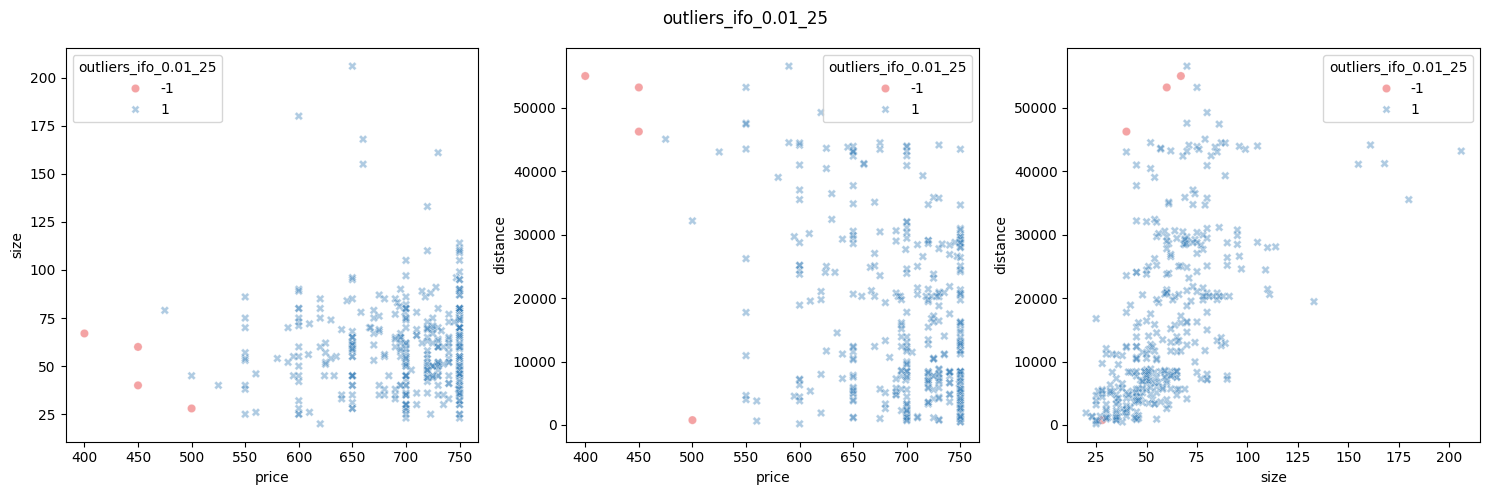

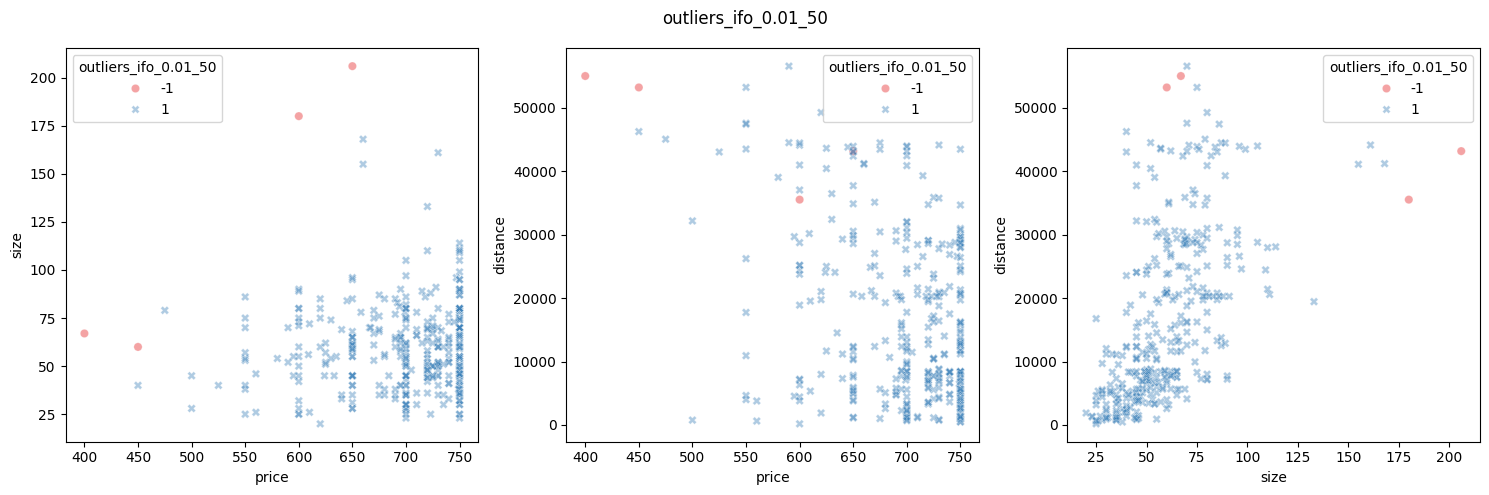

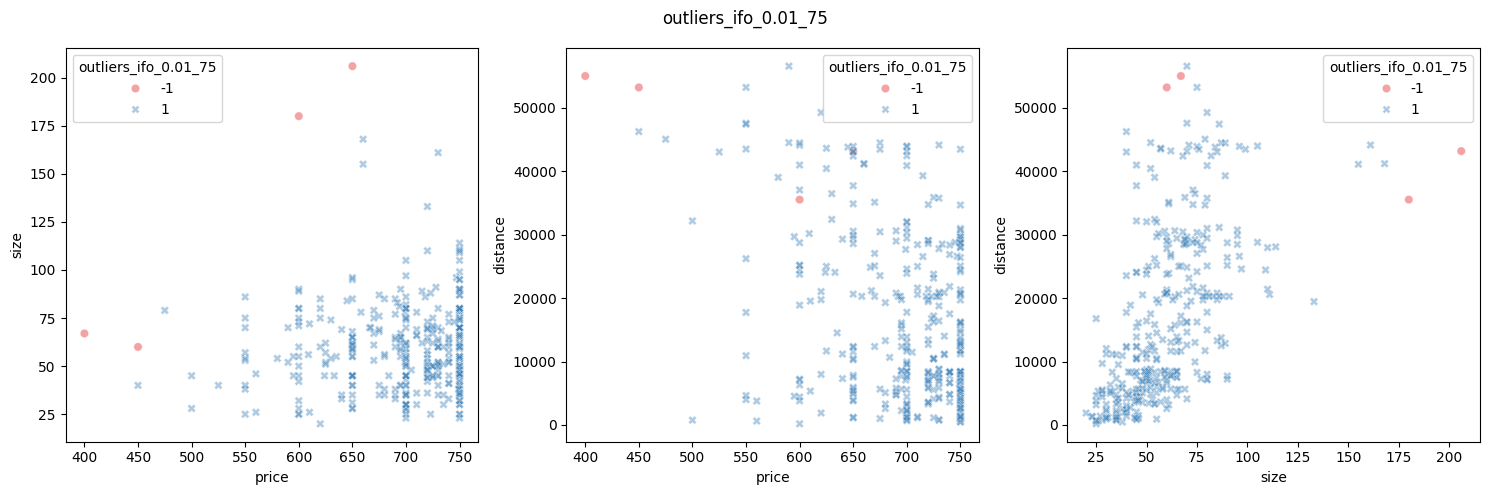

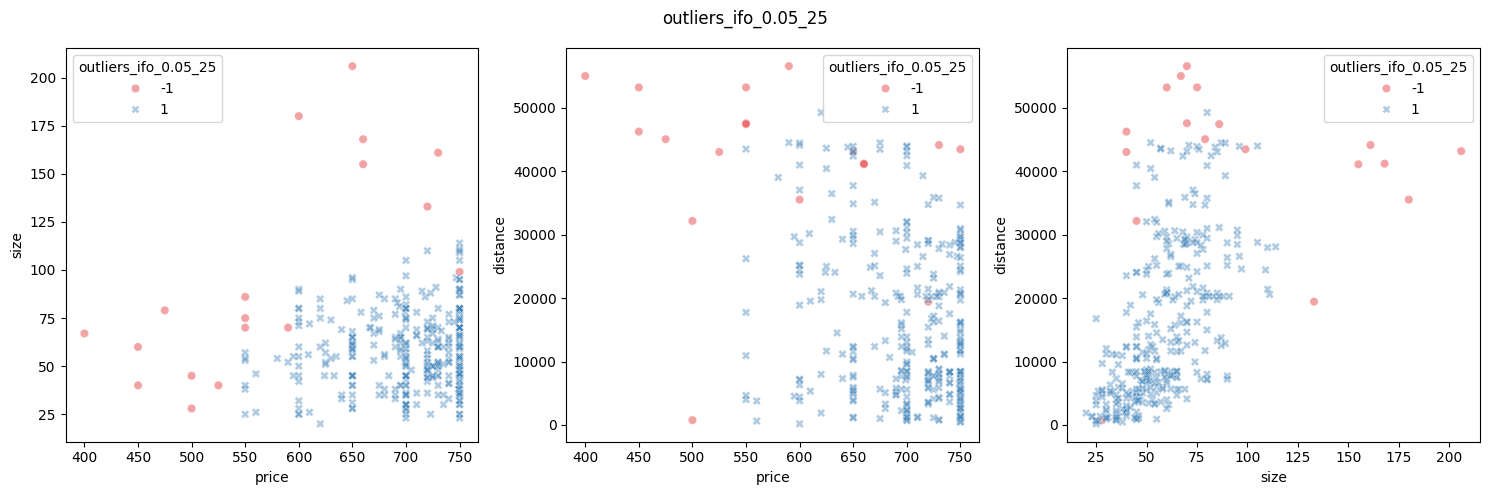

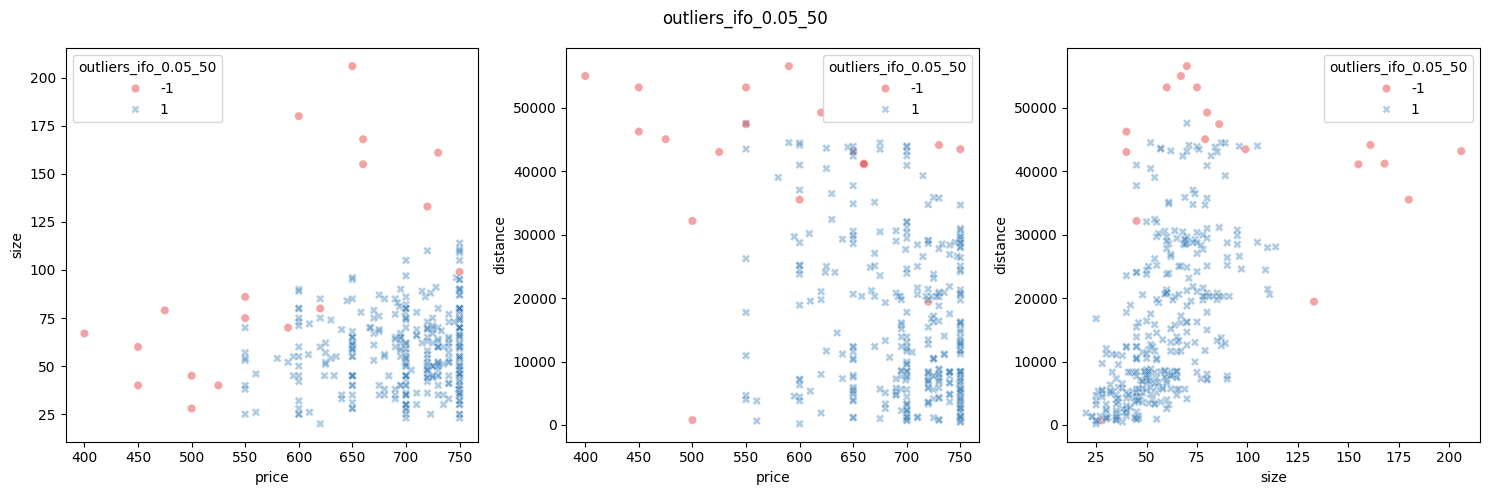

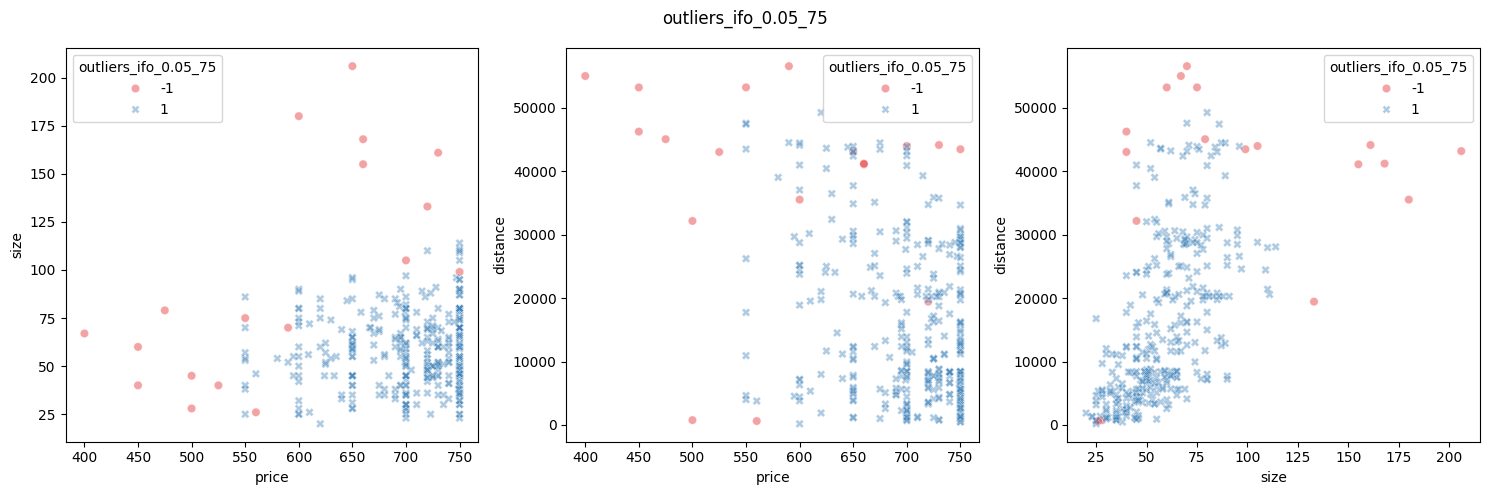

In [94]:
sn.visualizar_outliers(df, col_numericas)

Consideraremos outliers aquellas filas que contengan más de 70% de nulos, en este caso, si tenemos 6 columnas de outliers, que serían 4.

In [95]:
cantidad_col = 4
df_filtrado = df[(df == -1).sum(axis=1) > cantidad_col]
df_filtrado

,price,size,distance,exterior,rooms,bathrooms,floor,hasLift,propertyType_chalet,propertyType_countryHouse,...,propertyType_flat,propertyType_penthouse,propertyType_studio,municipality,outliers_ifo_0.01_25,outliers_ifo_0.01_50,outliers_ifo_0.01_75,outliers_ifo_0.05_25,outliers_ifo_0.05_50,outliers_ifo_0.05_75
2,400.0,67.0,55041,1,2,2,2.0,0,0.0,0.0,...,0.0,1.0,0.0,546.4573863636364,-1,-1,-1,-1,-1,-1
18,650.0,206.0,43195,0,3,1,-3.0,-1,1.0,0.0,...,0.0,0.0,0.0,670.6797922079181,1,-1,-1,-1,-1,-1
186,450.0,60.0,53238,1,1,1,-3.0,0,0.0,0.0,...,0.0,1.0,0.0,551.8827731805424,-1,-1,-1,-1,-1,-1
248,600.0,180.0,35543,0,3,2,-3.0,-1,1.0,0.0,...,0.0,0.0,0.0,646.4573863636364,1,-1,-1,-1,-1,-1


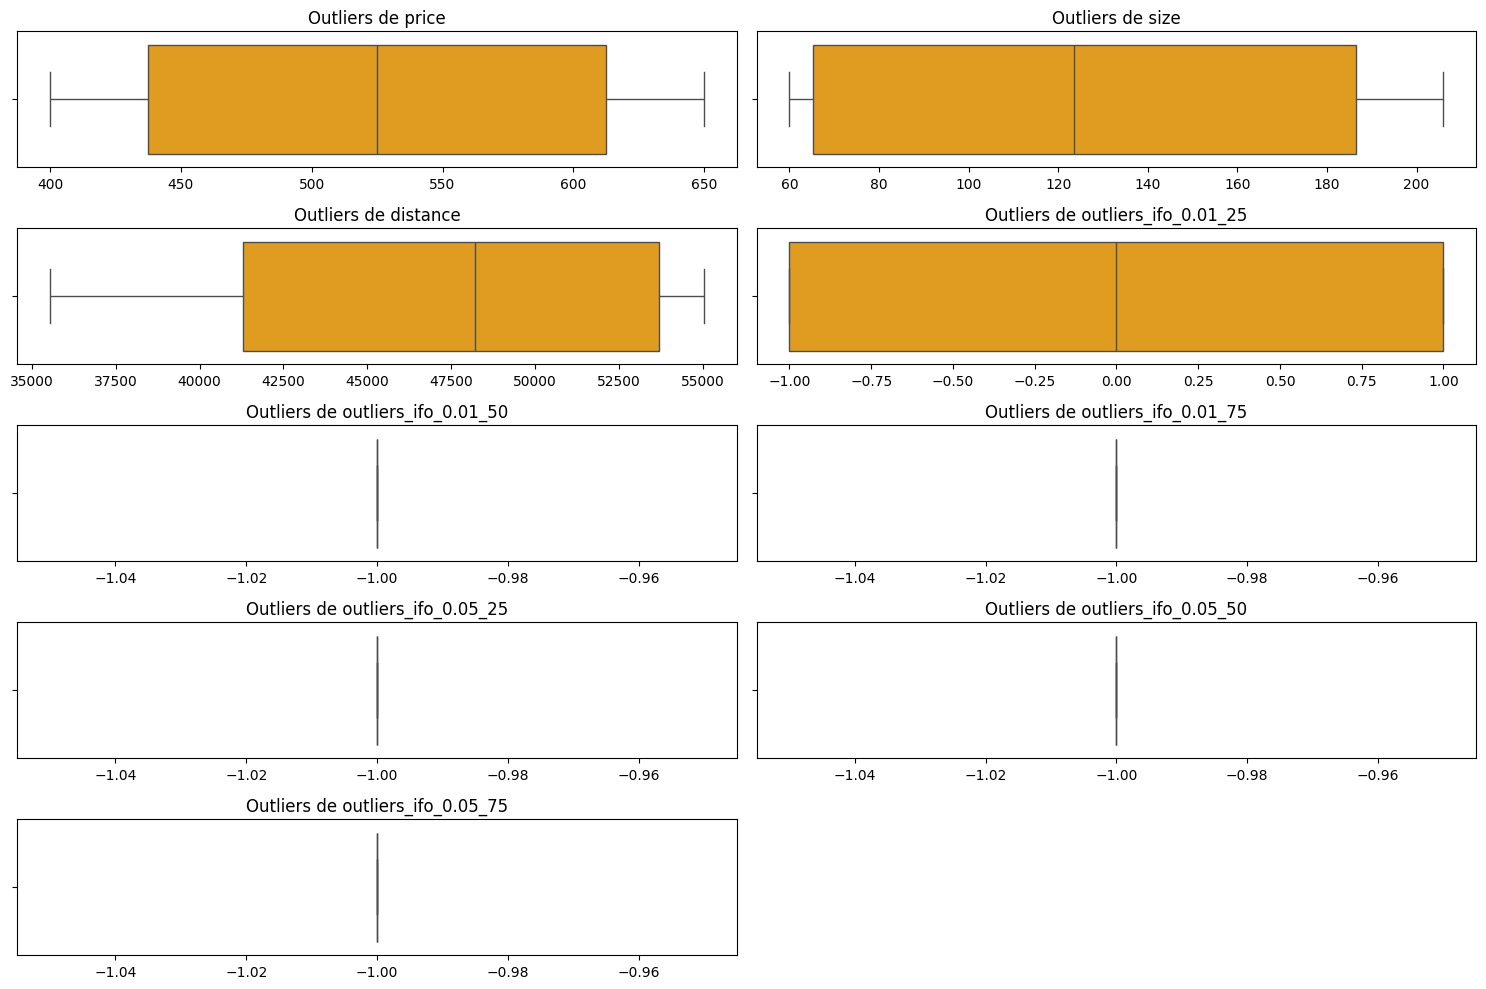

In [96]:
sp.detectar_outliers(df_filtrado)

- En este caso, tenemos únicamente 3 outliers. En esta segunda iteración, no sustituiremos por la mediana, sino que eliminaremos directamente esos valores.

In [97]:
df[~((df == -1).sum(axis=1) > cantidad_col)]

,price,size,distance,exterior,rooms,bathrooms,floor,hasLift,propertyType_chalet,propertyType_countryHouse,...,propertyType_flat,propertyType_penthouse,propertyType_studio,municipality,outliers_ifo_0.01_25,outliers_ifo_0.01_50,outliers_ifo_0.01_75,outliers_ifo_0.05_25,outliers_ifo_0.05_50,outliers_ifo_0.05_75
0,750.0,60.0,7037,1,1,1,3.0,1,0.0,0.0,...,1.0,0.0,0.0,705.6331360946746,1,1,1,1,1,1
1,750.0,70.0,16145,1,2,1,0.0,0,0.0,0.0,...,1.0,0.0,0.0,735.546085805312,1,1,1,1,1,1
3,590.0,70.0,56596,1,3,2,-3.0,0,0.0,0.0,...,1.0,0.0,0.0,641.4573863636364,1,1,1,-1,-1,-1
4,684.0,45.0,10656,1,0,1,-3.0,-1,0.0,0.0,...,0.0,0.0,1.0,705.6331360946746,1,1,1,1,1,1
5,600.0,73.0,37062,1,2,1,3.0,0,0.0,0.0,...,1.0,0.0,0.0,646.4573863636364,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,640.0,69.0,29311,1,2,1,2.0,1,0.0,0.0,...,1.0,0.0,0.0,666.4573863636364,1,1,1,1,1,1
348,700.0,54.0,11656,1,1,1,1.0,1,0.0,0.0,...,1.0,0.0,0.0,704.998508748505,1,1,1,1,1,1
349,700.0,59.0,7529,1,1,1,6.0,1,0.0,0.0,...,1.0,0.0,0.0,705.6331360946746,1,1,1,1,1,1
350,700.0,75.0,30359,1,2,1,1.0,0,0.0,0.0,...,1.0,0.0,0.0,705.0909090816765,1,1,1,1,1,1


In [98]:
df = df[~((df == -1).sum(axis=1) > cantidad_col)]

- A pesar de haber hecho una criba inicial en los tamaños de las casas y los precios, vemos todavía ruido en las gráficas por encima de 100m2, así que, acotaremos aún más el modelo y nos quedaremos con aquellas por debajo de ese valor. Son, en este caso, 7 viviendas.

In [99]:
df[df["size"] > 100]

,price,size,distance,exterior,rooms,bathrooms,floor,hasLift,propertyType_chalet,propertyType_countryHouse,...,propertyType_flat,propertyType_penthouse,propertyType_studio,municipality,outliers_ifo_0.01_25,outliers_ifo_0.01_50,outliers_ifo_0.01_75,outliers_ifo_0.05_25,outliers_ifo_0.05_50,outliers_ifo_0.05_75
19,700.0,105.0,44003,1,3,2,0.0,0,0.0,0.0,...,1.0,0.0,0.0,654.092671611573,1,1,1,1,1,-1
55,720.0,133.0,19453,0,3,2,1.0,1,0.0,0.0,...,1.0,0.0,0.0,671.0867531052564,1,1,1,-1,-1,-1
175,750.0,111.0,20583,1,2,2,6.0,1,0.0,0.0,...,1.0,0.0,0.0,705.499971553305,1,1,1,1,1,1
191,660.0,155.0,41119,0,3,2,-3.0,-1,0.0,0.0,...,1.0,0.0,0.0,654.092671611573,1,1,1,-1,-1,-1
195,660.0,168.0,41221,0,4,2,3.0,1,0.0,0.0,...,1.0,0.0,0.0,654.092671611573,1,1,1,-1,-1,-1
225,730.0,161.0,44159,1,4,1,3.0,0,0.0,0.0,...,1.0,0.0,0.0,654.092671611573,1,1,1,-1,-1,-1
226,720.0,110.0,21417,0,2,1,-3.0,1,0.0,0.0,...,1.0,0.0,0.0,705.499971553305,1,1,1,1,1,1
249,750.0,109.0,24455,1,2,2,3.0,1,0.0,0.0,...,1.0,0.0,0.0,661.0789132060843,1,1,1,1,1,1
256,750.0,105.0,28810,1,3,1,1.0,0,0.0,0.0,...,1.0,0.0,0.0,734.6474178380435,1,1,1,1,1,1
318,750.0,114.0,28099,1,3,3,1.0,0,0.0,0.0,...,0.0,0.0,0.0,721.4573863636364,1,1,1,1,1,1


- Aplicamos el filtro:

In [100]:
df = df[df["size"] < 100]

- Eliminamos todas las columnas de outliers generadas por el Isolation Forest.

In [101]:
df.drop(columns=['outliers_ifo_0.01_25', 'outliers_ifo_0.01_50',
       'outliers_ifo_0.01_75', 'outliers_ifo_0.05_25', 'outliers_ifo_0.05_50',
       'outliers_ifo_0.05_75'], inplace=True)

In [102]:
df.head()

,price,size,distance,exterior,rooms,bathrooms,floor,hasLift,propertyType_chalet,propertyType_countryHouse,propertyType_duplex,propertyType_flat,propertyType_penthouse,propertyType_studio,municipality
0,750.0,60.0,7037,1,1,1,3.0,1,0.0,0.0,0.0,1.0,0.0,0.0,705.6331360946746
1,750.0,70.0,16145,1,2,1,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,735.546085805312
3,590.0,70.0,56596,1,3,2,-3.0,0,0.0,0.0,0.0,1.0,0.0,0.0,641.4573863636364
4,684.0,45.0,10656,1,0,1,-3.0,-1,0.0,0.0,0.0,0.0,0.0,1.0,705.6331360946746
5,600.0,73.0,37062,1,2,1,3.0,0,0.0,0.0,0.0,1.0,0.0,0.0,646.4573863636364


In [103]:
df.shape

(337, 15)

- Guardamos el DF que pasará al paso #4 del preprocesamiento, donde realizaremos la Estandarización de las variables numéricas.

In [104]:
df.to_csv("../../datos/modelo2/csv_sin_outliers.csv")